In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
ovariancancer_obs_path = './ovariancancer_obs.csv'
ovariancancer_grp_path = './ovariancancer_grp.csv'
A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != '']
n_features = A.shape[0]
n_patients = A.shape[1]
print('%d patients' % n_patients)
print('%d features' % n_features)

216 patients
4000 features


In [2]:
# implement the randomized svd
def randomized_svd(A, k):
    m, n = A.shape
    Omega = np.random.randn(n, k)
    Y = A @ Omega
    Q, _ = np.linalg.qr(Y)
    B = Q.transpose() @ A
    Uhat, S, V = np.linalg.svd(B, full_matrices=False)
    U = Q @ Uhat
    return U, S, V



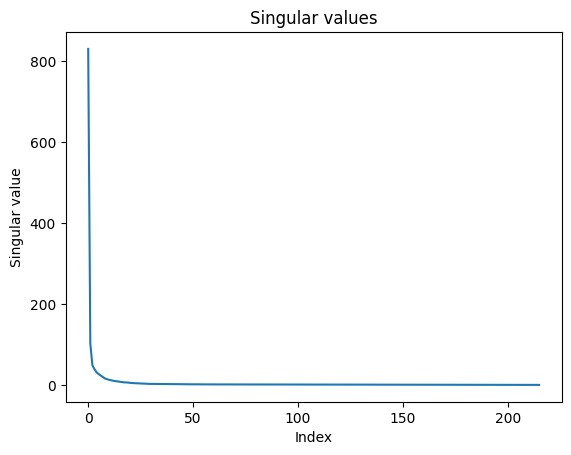

In [3]:
# perform PCA on the data
U, S, V = np.linalg.svd(A, full_matrices=False)

#plot the singular values
plt.figure()
plt.plot(S)
plt.title('Singular values')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.savefig('singular_values.png')
plt.show()

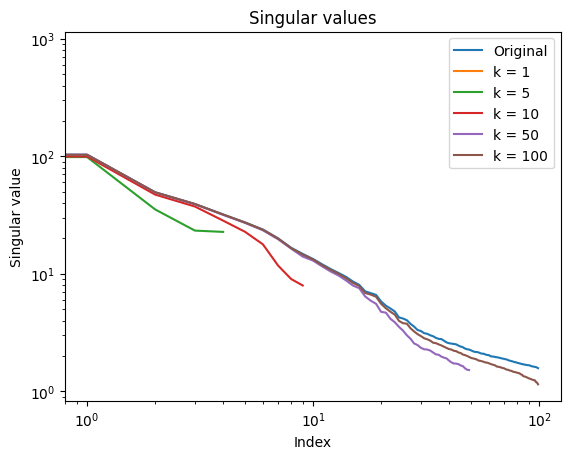

In [4]:
k_vals = [1, 5, 10, 50, 100]

sing_vals_rand = []
for k in k_vals:
    u, s, v = randomized_svd(A, k)
    sing_vals_rand.append(s)

#plot the singular values for randomized svd together with the original
plt.figure()
plt.loglog(S[:100], label='Original')
for i in range(len(k_vals)):
    plt.loglog(sing_vals_rand[i], label='k = %d' % k_vals[i])
plt.title('Singular values')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.legend()
plt.show()
    

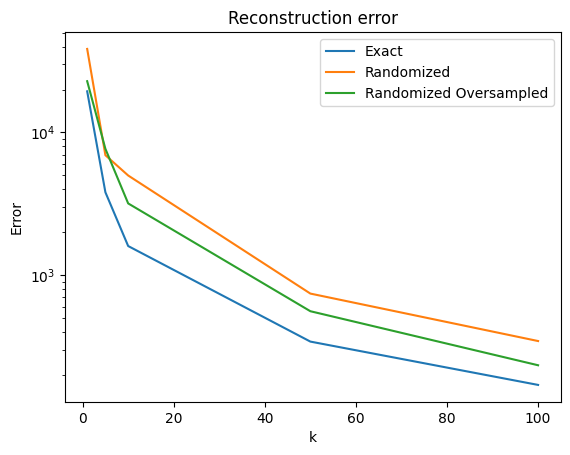

In [5]:
# PCA with exact SVD, for k=[1,5,10,50,100]
error_exact = []
error_rand = []
error_rand_ovsamp = []

for k in k_vals:
    # compute the projection matrix
    P = U[:, :k] @ U[:, :k].transpose()
    # project the data
    A_proj = P @ A
    # compute the error
    error_exact.append(np.linalg.norm(A - A_proj, ord='fro')**2)
    
for k in k_vals:
    u, _, _ = randomized_svd(A, k)
    # compute the projection matrix
    P = u[:, :k] @ u[:, :k].transpose()
    # project the data
    A_proj = P @ A
    # compute the error
    error_rand.append(np.linalg.norm(A - A_proj, ord='fro')**2)
    
for k in k_vals:
    u, _, _ = randomized_svd(A, int(k*1.5))
    # compute the projection matrix
    P = u[:, :k] @ u[:, :k].transpose()
    # project the data
    A_proj = P @ A
    # compute the error
    error_rand_ovsamp.append(np.linalg.norm(A - A_proj, ord='fro')**2)
    
plt.figure()
plt.semilogy(k_vals, error_exact, label='Exact')
plt.semilogy(k_vals, error_rand, label='Randomized')
plt.semilogy(k_vals, error_rand_ovsamp, label='Randomized Oversampled')
plt.title('Reconstruction error')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

In [16]:
patients_cancer = grp == 'Cancer'

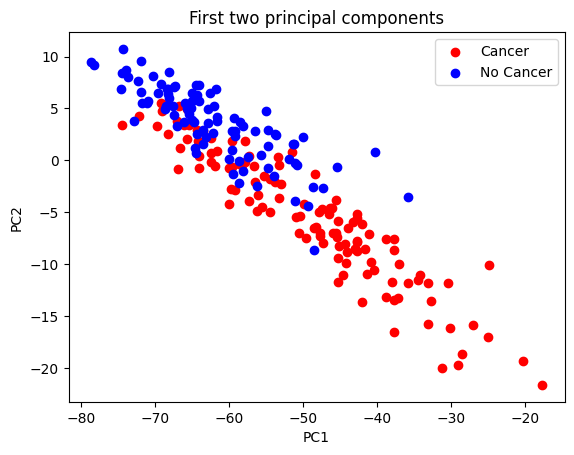

In [19]:
c1 = U[:, 0] @ A
c2 = U[:, 1] @ A

# make a scatter plot of the first two principal components with exact SVD, plotting in red patients in the group ”cancer” and in blue the patients in the remaining group
plt.figure()
plt.scatter(c1[grp=='Cancer'], c2[grp=='Cancer'], c='r', label='Cancer')
plt.scatter(c1[grp!='Cancer'], c2[grp!='Cancer'], c='b', label='No Cancer')
plt.title('First two principal components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


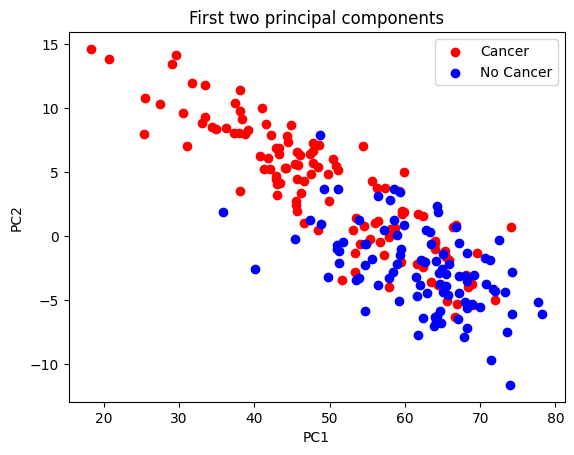

In [20]:
u,_,_ = randomized_svd(A, 2)
c1 = u[:, 0] @ A
c2 = u[:, 1] @ A

# make a scatter plot of the first two principal components with exact SVD, plotting in red patients in the group ”cancer” and in blue the patients in the remaining group
plt.figure()
plt.scatter(c1[grp=='Cancer'], c2[grp=='Cancer'], c='r', label='Cancer')
plt.scatter(c1[grp!='Cancer'], c2[grp!='Cancer'], c='b', label='No Cancer')
plt.title('First two principal components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [21]:
import time
# compute the exact SVD
start = time.time()
U, S, V = np.linalg.svd(A, full_matrices=False)
print('Exact SVD took %f seconds' % (time.time() - start))

start = time.time()
u, s, v = randomized_svd(A, 2)
print('Randomized SVD took %f seconds' % (time.time() - start))



Exact SVD took 0.141431 seconds
Randomized SVD took 0.002053 seconds
